In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [2]:
data = pd.read_csv("../data/1_set.csv")

In [3]:
data

,tweet,hate,offensive,ok
0,!!! RT @mayasolovely: As a woman you shouldn't...,0,0,1
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,0,1,0
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,0,1,0
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,0,1,0
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,0,1,0
...,...,...,...,...
40954,@scaryjen @Alfuriuskj @Nayadrikj undead 4ever.,0,0,1
40955,Here's a suggestion,0,0,1
40956,@ardiem1m @Alfonso_AraujoG @MaxBlumenthal @old...,0,0,1
40957,Oh I knew it. Fuuuck. More restaurants. Ok I s...,0,0,1


In [4]:
data.sample(5)

,tweet,hate,offensive,ok
6664,@megann_17 you should make me brownies!,0,0,1
1505,&#8220;@SEM25LIVE Girl you eat mo pussy than m...,0,1,0
10289,I feel like slapping a bitch,0,1,0
24096,is she choking it!! &#128563;&#128563;&#128584...,0,0,1
19826,RT @paulabruederle: Some birds aren't meant to...,0,0,1


In [5]:
cols_target = ['hate', 'offensive', 'ok']

In [6]:
data.describe()

,hate,offensive,ok
count,40959.000000,40959.000000,40959.000000
mean,0.119144,0.587661,0.496570
std,0.323961,0.492262,0.499994
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000
75%,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


In [7]:
data['tweet'].isnull().sum()

0

In [8]:
print(data[cols_target].sum())

hate          4880
offensive    24070
ok           20339
dtype: int64


length of the text in the tweets:

In [9]:
data['text_length'] = data['tweet'].apply(lambda x:len(str(x)))

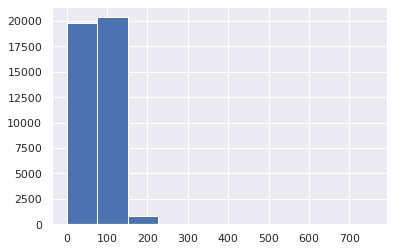

In [10]:
#histogram plot for text length
sns.set()
data['text_length'].hist()
plt.show()

Most of the text is less than 300 chars

# Cleaning up the text

In [11]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's","what is", text)
    text = re.sub(r"\'ve","have", text)
    text = re.sub(r"can't","cannot",text)
    text = re.sub(r"n't", "not", text)
    text = re.sub(r"i'm","i am", text)
    text = re.sub(r"\'re'","are", text)
    text = re.sub(r"\'d'","would",text)
    text = re.sub(r"\'ll'", "will", text)
    text = re.sub(r"\'scuse'", "excuse", text)
    text = re.sub("\W",' ', text)
    text = re.sub('\s+',' ',text)
    text = text.strip(' ')
    return text

In [12]:
data['tweet'] = data['tweet'].map(lambda x: clean_text(x))

In [13]:
data['tweet']

0        rt mayasolovely as a woman you shouldnot compl...
1        rt mleew17 boy dats cold tyga dwn bad for cuff...
2        rt urkindofbrand dawg rt 80sbaby4life you ever...
3        rt c_g_anderson viva_based she look like a tranny
4        rt shenikaroberts the shit you hear about me m...
                               ...                        
40954           scaryjen alfuriuskj nayadrikj undead 4ever
40955                                  here s a suggestion
40956    ardiem1m alfonso_araujog maxblumenthal oldkhay...
40957    oh i knew it fuuuck more restaurants ok i said...
40958    kickyfast bonegolem totalbiscuit srhbutts nice...
Name: tweet, Length: 40959, dtype: object

In [14]:
data = data.drop('text_length', axis=1)
data.shape

(40959, 4)

## Vectorization

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features=300, stop_words = 'english')
vect

TfidfVectorizer(max_features=300, stop_words='english')

In [20]:
X = data.tweet

In [21]:
X_dtm = vect.fit_transform(X)
X_dtm

<40959x300 sparse matrix of type '<class 'numpy.float64'>'
	with 136907 stored elements in Compressed Sparse Row format>

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg =LogisticRegression(tol = 0.0001,C=1.0, max_iter=10000)

for label in cols_target:
    print('...Processing {}'.format(label))
    y = data[label]
    logreg.fit(X_dtm,y)
    y_pred_X = logreg.predict(X_dtm)
    print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))

...Processing hate
Training accuracy is 0.8940647965038209
...Processing offensive
Training accuracy is 0.8814424180277839
...Processing ok
Training accuracy is 0.946849288312703


In [44]:
def add_feature(X, feature_to_add):
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

In [45]:
for label in cols_target:
    print('...Processing {}'.format(label))
    y = data[label]
    logreg.fit(X_dtm,y)
    y_pred_X = logreg.predict(X_dtm)
    print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
    
    X_dtm = add_feature(X_dtm, y)
    print('TShape of X_dtm is now {}'.format(X_dtm.shape))

...Processing hate
Training accuracy is 0.8940647965038209
TShape of X_dtm is now (40959, 301)
...Processing offensive
Training accuracy is 0.957787055348031
TShape of X_dtm is now (40959, 302)
...Processing ok
Training accuracy is 0.992358211870407
TShape of X_dtm is now (40959, 303)
